#Multi-layer Perceptron

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns


In [ ]:
# Load tips dataset
titanic =  sns.load_dataset('titanic')
# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)
# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)
# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape[1]

18

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.3220 - mae: 0.4406
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1654 - mae: 0.3042
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1362 - mae: 0.2791
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1252 - mae: 0.2693
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1200 - mae: 0.2584
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1149 - mae: 0.2516
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1107 - mae: 0.2405
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1080 - mae: 0.2378
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1071 - mae: 0.2372
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1050 - mae: 0.2275
Epoch 11/100
18/18 [==============================] - 0s 2

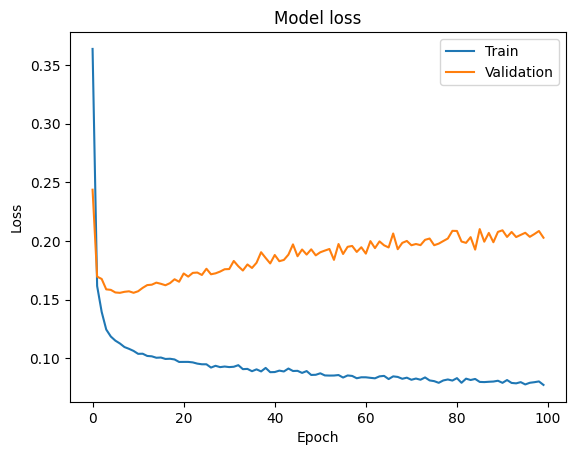

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
18/18 [==============================] - 2s 17ms/step - loss: 0.4170 - val_loss: 0.2875
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1857 - val_loss: 0.1969
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1431 - val_loss: 0.1783
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1306 - val_loss: 0.1731
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1232 - val_loss: 0.1733
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1173 - val_loss: 0.1723
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 0.1136 - val_loss: 0.1711
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 0.1104 - val_loss: 0.1721
Epoch 9/100
18/18 [==============================] - 0s 16ms/step - loss: 0.1096 - val_loss: 0.1708
Epoch 10/100
18/18 [==============================] - 0s 12ms/step - loss: 0.1085 - val_loss: 0.1750
Epoc

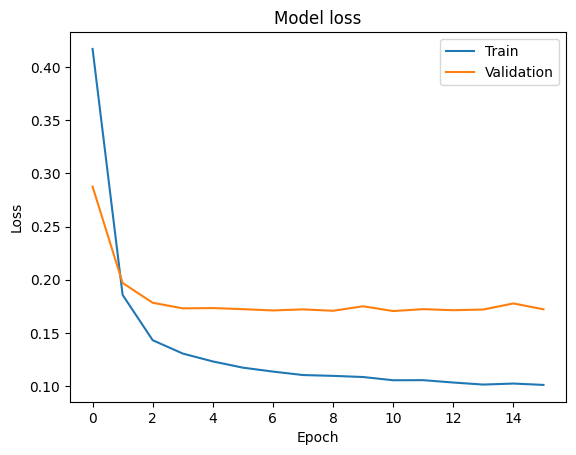

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
